c:\Users\SH\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
c:\Users\SH\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
c:\Users\SH\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                     EM   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     508.4
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           2.10e-12
Time:                        01:15:14   Log-Likelihood:                -13.331
No. Observations:                  16   AIC:                             30.66
Df Residuals:                      14   BIC:                             32.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.2643      0.989     43.732      0.0

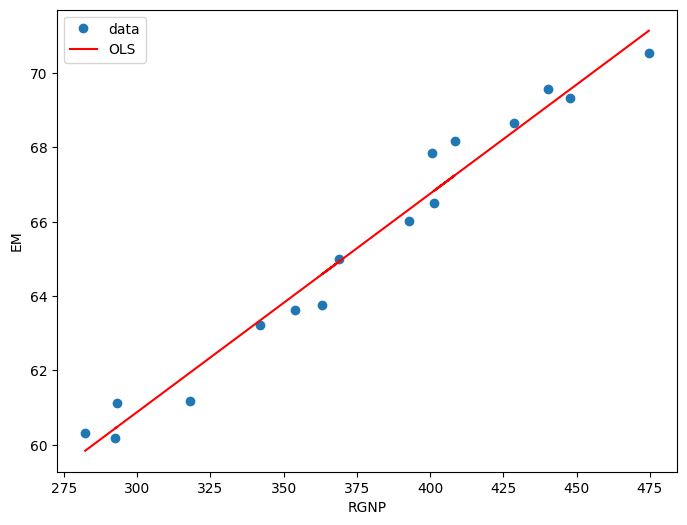

In [1]:
"""
 Example 3.1
 Simple Regression
"""
import numpy as np
import pandas as pd
# pip install statsmodels
# pip install matplotlib
import statsmodels.api as sm
# data = sm.datasets.longley.load(as_pandas=False)
data=pd.read_csv('econ_book_data\LONGLEY.txt',sep='\s+',nrows=16)
PGNP=data['PGNP']
GNP=data['GNP']/1000
EM=data['EM']/1000
RGNP=100*GNP/PGNP

model=sm.OLS(EM,sm.add_constant(RGNP))
results=model.fit()
print(results.summary())

# using R style of formula
df1=pd.concat([EM,RGNP])
model1=sm.OLS.from_formula('EM~RGNP',data=df1)
results1=model1.fit()
print(results1.summary())

import statsmodels.formula.api as smf
model2=smf.ols('EM~RGNP',data=df1)
results2=model2.fit()
print(results2.summary())

import matplotlib.pyplot as plt
EM_fitted = results1.fittedvalues

fig, ax = plt.subplots(figsize=(8, 6)) 
ax.plot(RGNP, EM, 'o', label = 'data') 
ax.plot(RGNP, EM_fitted, 'r-', label = 'OLS') 
ax.legend(loc='best') 
plt.xlabel('RGNP') 
plt.ylabel('EM')
plt.show()

In [2]:
"""
# Example 3.2
# Residual Analysis
"""
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf 

data=pd.read_csv('econ_book_data/longley.txt',sep='\s+',nrows=16)
PGNP=data['PGNP']
GNP=data['GNP']/1000
EM=data['EM']/1000
RGNP=100*GNP/PGNP

df1=pd.concat([EM,RGNP],axis=1)
model1=smf.ols('EM~RGNP',data=df1)
results1=model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                     EM   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     508.4
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           2.10e-12
Time:                        01:15:15   Log-Likelihood:                -13.331
No. Observations:                  16   AIC:                             30.66
Df Residuals:                      14   BIC:                             32.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.2643      0.989     43.732      0.0

c:\Users\SH\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [3]:
from statsmodels.stats.anova import anova_lm 
anova_lm(results1)

,df,sum_sq,mean_sq,F,PR(>F)
RGNP,1.0,180.050599,180.050599,508.389059,2.104841e-12
Residual,14.0,4.958227,0.354159,NaN,NaN


In [4]:
EM_fitted = pd.Series(results1.fittedvalues)
resid1 = pd.Series(results1.resid)
List = pd.concat([EM, EM_fitted, resid1], 
                 keys=['Observed', 'Predicted', 'Residual'], axis=1) 
List

,Observed,Predicted,Residual
0,60.323,59.841050,0.481950
1,61.122,60.478857,0.643143
2,60.171,60.446060,-0.275060
3,61.187,61.938244,-0.751244
4,63.221,63.346607,-0.125607
5,63.639,64.036621,-0.397621
6,64.989,64.938415,0.050585
7,63.761,64.588191,-0.827191
8,66.019,66.329045,-0.310045
9,67.857,66.798248,1.058752


<AxesSubplot: ylabel='Density'>

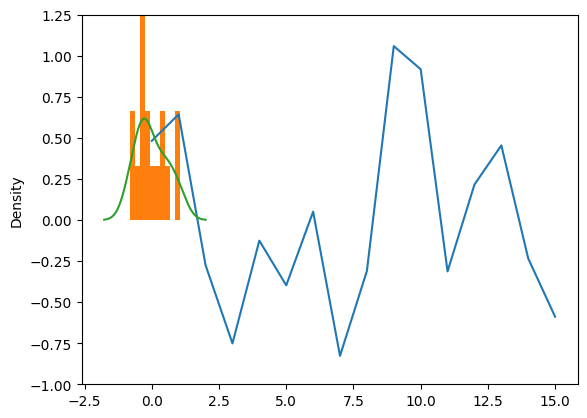

In [5]:
import matplotlib.pyplot as plt

resid1.plot(ylim=(-1, 1.25))

resid1.plot.hist(density=True)
resid1.plot.density()

                            OLS Regression Results                            
Dep. Variable:                     EM   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     246.8
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           4.57e-11
Time:                        01:15:15   Log-Likelihood:                -12.983
No. Observations:                  16   AIC:                             31.97
Df Residuals:                      13   BIC:                             34.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.6508      8.463      5.867      0.0

c:\Users\SH\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\SH\AppData\Local\Temp\ipykernel_3020\123890151.py:38: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print(results2.cov_params() / results2.bse / results2.bse[:, np.newaxis])


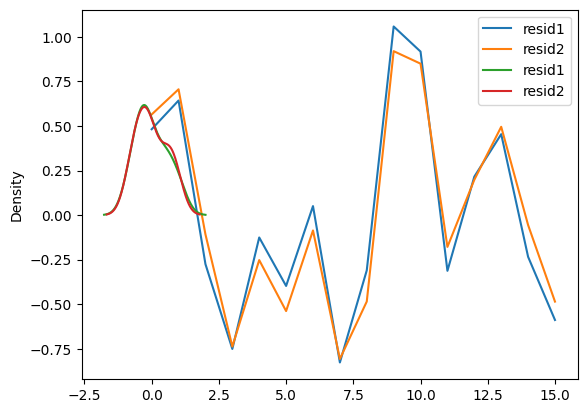

In [6]:
"""
# Example 3.3
# Multiple Regression
"""
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

data=pd.read_csv('econ_book_data/longley.txt',sep='\s+',nrows=16)
PGNP=data['PGNP']
GNP=data['GNP']/1000
POPU=data['POP']/1000
EM=data['EM']/1000
RGNP=100*GNP/PGNP

df=pd.concat([EM,RGNP,POPU])
results1=smf.ols('EM~RGNP',data=df).fit()
results2=smf.ols('EM~RGNP+POPU',data=df).fit()
print(results2.summary())

from statsmodels.stats.anova import anova_lm 
anova_lm(results2)

def reg_anova(model):
    res = pd.DataFrame({'SS': [model.ess, model.ssr, model.centered_tss],
                        'DF': [model.df_model, model.df_resid, model.nobs-1],
                        'MSS': [model.mse_model, model.mse_resid, model.mse_total],
                        'F': [model.fvalue, np.nan, np.nan],
                        'Prob>F': [model.f_pvalue, np.nan, np.nan]},
                       index=['Explained', 'Residual', 'Total'])
    return res

print(reg_anova(results2))

print('Variance-Covariance Matrix of Coefficients')
print(results2.cov_params())
print('Correlation Matrix of Coefficients')
print(results2.cov_params() / results2.bse / results2.bse[:, np.newaxis])

Predicted = pd.Series(results2.fittedvalues)
Residual = pd.Series(results2.resid)
List = pd.concat([EM, Predicted, Residual],
                 keys=['Observed', 'Predicted', 'Residual'], axis=1) 
List

import matplotlib.pyplot as plt 
resid1 = results1.resid
resid2 = results2.resid 

resid1.plot(label='resid1') 
resid2.plot(label='resid2') 
plt.legend(loc='best')

resid1.plot.density(label='resid1') 
resid2.plot.density(label='resid2') 
plt.legend(loc='best')

In [7]:
"""
# Example 3.5
# Testing for Structural Change
"""

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf

data=pd.read_csv('econ_book_data/cjx.txt',sep='\s+',nrows=39)

year=data['YEAR']
X=np.log(data['X'])
L=np.log(data['L1']) 
K=np.log(data['K1'])

df = pd.concat([X, L, K], keys=['X', 'L', 'K'], axis=1) 
model = smf.ols(formula='X ~ L + K', data=df).fit()
print(model.summary())
model1 = smf.ols(formula='X ~ L + K', data=df, subset=year<1949).fit()
print(model1.summary())
model2 = smf.ols(formula='X ~ L + K', data=df, subset=year>1948).fit()
print(model2.summary())

# from statsmodels.iolib.summary2 import summary_col
# summary_col([model,model1,model2],stars=True,info_dict={"N":lambda x:(x.nobs)})

DFr = model.df_resid
RSSr = model.ssr
DF1 = model1.df_resid
RSS1 = model1.ssr
DF2 = model2.df_resid
RSS2 = model2.ssr
DFur = DF1+DF2
RSSur = RSS1+RSS2

# Chow test
Ftest = ((RSSr-RSSur)/(DFr-DFur))/(RSSur/DFur)
Ftest
# Calculate P-value
1-stats.f.cdf(Ftest, DFr-DFur, DFur)
# threshold = stats.f.ppf(0.95, DFr-DFur, DFur)

                            OLS Regression Results                            
Dep. Variable:                      X   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     3332.
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           1.39e-41
Time:                        01:15:15   Log-Likelihood:                 77.286
No. Observations:                  39   AIC:                            -148.6
Df Residuals:                      36   BIC:                            -143.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.9377      0.237    -16.615      0.0

c:\Users\SH\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


0.3027452451222503

                            OLS Regression Results                            
Dep. Variable:                      X   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     3332.
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           1.39e-41
Time:                        01:16:30   Log-Likelihood:                 77.286
No. Observations:                  39   AIC:                            -148.6
Df Residuals:                      36   BIC:                            -143.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.9377      0.237    -16.615      0.0

,hat_diag,standard_resid,student_resid,dffits
0,0.048570,-0.375557,-0.371032,-0.083832
1,0.069668,-1.281900,-1.293845,-0.354063
2,0.092468,-1.206930,-1.214882,-0.387792
3,0.200928,-0.417838,-0.412996,-0.207096
4,0.185268,-0.970980,-0.970188,-0.462646
5,0.120347,-0.611955,-0.606559,-0.224355
6,0.088917,-0.239851,-0.236686,-0.073941
7,0.063757,0.309555,0.305632,0.079757
8,0.064645,-0.076541,-0.075477,-0.019842
9,0.067310,1.356156,1.372712,0.368765


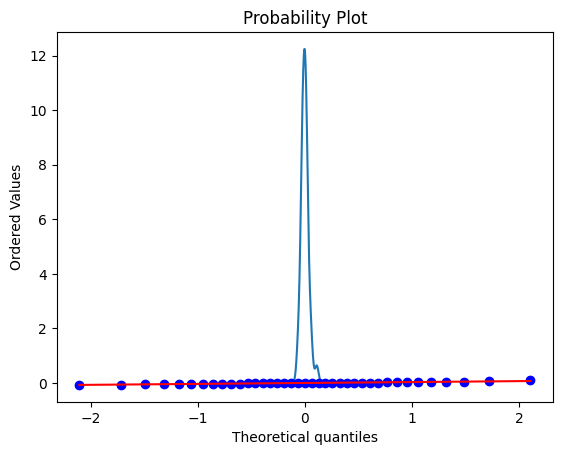

In [11]:
"""
# Example 3.6
# Residual Diagnostics
"""

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf

data=pd.read_csv('econ_book_data/cjx.txt',sep='\s+',nrows=39)

year=data['YEAR']
X=np.log(data['X'])
L=np.log(data['L1']) 
K=np.log(data['K1'])

df = pd.concat([X, L, K], keys=['X', 'L', 'K'], axis=1) 
model = smf.ols(formula='X ~ L + K', data=df).fit()
print(model.summary())

JBtest = stats.jarque_bera(model.resid)
JBtest[0]
JBtest[1] # p-value = 1-stats.chi2.cdf(JB[0], 2) 

# check for residual normality
import matplotlib.pyplot as plt
model.resid.plot.density()
stats.probplot(model.resid, dist='norm', plot=plt) 

# residual diagnostics
from statsmodels.stats.outliers_influence import OLSInfluence
res_diag = OLSInfluence(model).summary_frame() 
res_diag[['hat_diag', 'standard_resid', 'student_resid', 'dffits']]

In [13]:
# Example 5.1
# Condition Number and Correlation Matrix
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

data=pd.read_csv('econ_book_data/longley.txt',sep='\s+',nrows=16)

model = smf.ols(formula='EM ~ YEAR + PGNP + GNP + AF',data = data).fit() 
print(model.summary())

#condition number 
model.condition_number
# cm=model.eigenvals
# np.sqrt(max(cm)/min(cm))

#correlation matrix 
data[['EM', 'YEAR', 'PGNP', 'GNP', 'AF']].corr()

# alternatively, using design-matrix to compute the condition number
# pip install patsy
import patsy as pt
y, X = pt.dmatrices('EM ~ YEAR + PGNP + GNP + AF',data = data)
np.linalg.cond(X)

                            OLS Regression Results                            
Dep. Variable:                     EM   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     101.1
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           1.35e-08
Time:                        01:21:50   Log-Likelihood:                -123.76
No. Observations:                  16   AIC:                             257.5
Df Residuals:                      11   BIC:                             261.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.169e+06   8.36e+05      1.399      0.1

c:\Users\SH\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


2001533396.5447702

In [15]:
# Example 5.2
# Theil's Measure of Multicollinearity

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

data=pd.read_csv('econ_book_data\longley.txt',sep='\s+',nrows=16)

model = smf.ols(formula='EM ~ YEAR + PGNP + GNP + AF',data = data).fit() 
print(model.summary())
R2 = model.rsquared 
R21 = smf.ols(formula='EM ~ PGNP + GNP + AF',data = data).fit().rsquared 
R22 = smf.ols(formula='EM ~ YEAR + GNP + AF',data = data).fit().rsquared 
R23 = smf.ols(formula='EM ~ YEAR + PGNP + AF',data = data).fit().rsquared 
R24 = smf.ols(formula='EM ~ YEAR + PGNP + GNP',data = data).fit().rsquared
theil = R2 - (R2 - R21) - (R2 - R22) - (R2 - R23) - (R2 - R24) 
print("Thiel's Measure of Multicollinearity = %f" % theil) 

                            OLS Regression Results                            
Dep. Variable:                     EM   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     101.1
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           1.35e-08
Time:                        01:23:08   Log-Likelihood:                -123.76
No. Observations:                  16   AIC:                             257.5
Df Residuals:                      11   BIC:                             261.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.169e+06   8.36e+05      1.399      0.1

c:\Users\SH\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [16]:
# Example 5.3
# Lesson 5.3: Variance Inflation Factors (VIF)
import numpy as np
import pandas as pd 
import statsmodels.api as sm

data=pd.read_csv('econ_book_data/longley.txt',sep='\s+',nrows=16)

def vif(df, col): 
    k_vars = df.shape[1] 
    x_i = df[col] 
    x_noti = df.drop([col], axis=1) 
    X = sm.add_constant(x_noti) 
    r_squared_i = sm.OLS(x_i, X).fit().rsquared 
    vif = 1 / (1 - r_squared_i)
    vif_list = [col, r_squared_i, vif] 
    vif_df = pd.DataFrame(vif_list, index=['Variable', 'R-Squared', 'VIF']).T 
    return vif_df

df1 = data[['YEAR', 'PGNP', 'GNP', 'AF']] 
vif_table = pd.concat([vif(df1, col) for col in df1.columns], ignore_index=True) 
print(vif_table)

X = sm.add_constant(df1) 
model1 = sm.OLS(data.EM, X).fit()
model1.summary()

# alternatively using statsmodels.states.outliners_influence
from statsmodels.stats.outliers_influence import variance_inflation_factor
Xm = np.array(X)  # index 0 is constant
VIF1 = variance_inflation_factor(Xm,1)
VIF2 = variance_inflation_factor(Xm,2)
VIF3 = variance_inflation_factor(Xm,3)
VIF4 = variance_inflation_factor(Xm,4)
VIF = np.array([VIF1,VIF2,VIF3,VIF4])
VIF

  Variable R-Squared         VIF
0     YEAR   0.99303  143.463545
1     PGNP  0.986785   75.670734
2      GNP  0.992451  132.463801
3       AF  0.356164    1.553191


c:\Users\SH\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


array([143.46354536,  75.670734  , 132.46380091,   1.55319088])

In [17]:
# Example 5.4
# Ridge Regression and Principal Components

import numpy as np 
import pandas as pd 
import statsmodels.api as sm

data=pd.read_csv('econ_book_data/longley.txt',sep='\s+',nrows=16)
df1 = data[['YEAR', 'PGNP', 'GNP', 'AF']] 

X = sm.add_constant(df1)

model1 = sm.OLS(data.EM, X).fit()
model1.summary()

# ridge regression model using linear algebra
from numpy.linalg import inv
b = np.array(model1.params) 
i = np.eye(5) 
var = model1.cov_params() 
ridge_coef = inv(i + .3*inv(X.T.dot(X))).dot(b) 
ridge_var = (inv(i + .3*inv(X.T.dot(X))).dot(var)).dot(inv(i + .3*inv(X.T.dot(X)))) 
ridge_std = np.sqrt(np.diag(ridge_var))
print('Ridge Regression Model:') 
print(pd.DataFrame({'Coefficient': ridge_coef, 'Std Error': ridge_std}, columns=['Coefficient', 'Std Error'], index=['Constant', 'YEAR', 'PGNP', 'GNP', 'AF']),'\n')
# alternatively, ridge regression may be performed with
# statsmodels.regression.linear_model.OLS.fit_regularized
# or scikit-learn package

# principal components model using linear algebra
from numpy.linalg import eig
r, v = eig(X.T.dot(X)) 
v = v.T[r>0.1] 
v = v.T 
pca_coef = v.dot(v.T).dot(b) 
pca_var = (v.dot(v.T).dot(var)).dot(v.dot(v.T)) 
pca_std = np.sqrt(np.diag(pca_var))
print('Principal Components Model:') 
print(pd.DataFrame({'Coefficient': pca_coef, 'Std Error': pca_std}, columns=['Coefficient', 'Std Error'], index=['Constant', 'YEAR', 'PGNP', 'GNP', 'AF']))
# alternatively, PCA may call
# from statsmodels.multivariate.pca import PCA

Ridge Regression Model:
          Coefficient   Std Error
Constant     2.506087    1.775908
YEAR        29.749540    3.848473
PGNP       -99.843803  124.849876
GNP          0.043571    0.013233
AF           0.164520    0.281907 

Principal Components Model:
          Coefficient   Std Error
Constant     0.022451    0.010768
YEAR        29.783959    3.889331
PGNP      -100.924798  126.190415
GNP          0.043684    0.013372
AF           0.164989    0.282019


c:\Users\SH\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
